In [ ]:
# Modules, functions -- 

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# import multiprocessing

import matplotlib.pyplot as plt
# import bokeh
# import bokeh.io
# from bokeh.plotting import figure
# from bokeh.io import output_notebook, show

# init_notebook_mode()

# import re
# import math
# import copy

# from collections import defaultdict
# import csv
# import itertools
# import datetime 
# from datetime import datetime
# import time
# import dateutil.parser
# import pickle
# import random


from IPython.core.interactiveshell import InteractiveShell
from io import StringIO

# import dask.dataframe as dd
#from chest import Chest

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last"

# Magic function to make matplotlib inline
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
# bokeh.io.output_notebook()

# import dask.dataframe as ddf
# import dask.array as da

pd.set_option('max_columns', 500)
pd.set_option('max_rows', 1700)

# import scipy

# import statsmodels.api as sm
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.tsatools import detrend

import datetime as dt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import functions as fcns # custom functions Artem/Chris wrote


# Compare

In [124]:
c = pd.read_excel('data/SS21_forecasts_2020-01-22.xlsx', index_col=0)
j = pd.read_csv('data/SS21_RMA1_forecast.csv')

file_names = np.load('data/file_names.npy', allow_pickle=True).tolist()

In [ ]:
both = pd.merge(c[['article_number', 'y_hat', 'net_qty', 'Opt_Ovb']], j[['article_number', 'net_forecast', 'buy_recommendation']], on = 'article_number')

In [109]:
c.head(3)


,article_number,y_hat,net_qty,price,cost,margin,Opt_Ovb,model_no,art_desc,brand,rmh_cat_desc,prod_grp_desc,prod_type_desc,gender_desc,age_group_desc
0,019099,333,0,0,0,0,400,11130,SAMBA SUPER,adidas,ORIGINALS,SHOES,SHOES - LOW (NON FOOTBALL),MEN,ADULT
1,019332,1082,235,85,15,70,1299,20067,SAM SUPER SUEDE,adidas,ORIGINALS,SHOES,SHOES - LOW (NON FOOTBALL),MEN,ADULT
2,019351,1973,245,75,11,64,2974,88653,SAMOA,adidas,ORIGINALS,SHOES,SHOES - LOW (NON FOOTBALL),MEN,ADULT


In [ ]:
both[both.y_hat != both.net_forecast]
both[both.Opt_Ovb != both.buy_recommendation]


# Inspect 

In [122]:
c[c.Opt_Ovb > 30000]  #.sort_values('y_hat', ascending = False)

,article_number,y_hat,net_qty,price,cost,margin,Opt_Ovb,model_no,art_desc,brand,rmh_cat_desc,prod_grp_desc,prod_type_desc,gender_desc,age_group_desc
242,ED7820,50189,2526,28,4,23,60810,GDH76,3STRIPES LEGG,adidas,ORIGINALS,PANTS,PANTS (1/1),WOMEN,JUNIOR
560,G27706,39258,5039,99,16,84,47705,DRA67,CONTINENTAL 80,adidas,ORIGINALS,SHOES,SHOES - LOW (NON FOOTBALL),MEN,ADULT
587,S79168,61783,0,180,43,137,70843,KAA57,NMD_R1 PK,adidas,ORIGINALS,SHOES,SHOES - LOW (NON FOOTBALL),MEN,ADULT


# Magnifying Glass

In [127]:
file_names = np.load('data/file_names.npy', allow_pickle=True).tolist()

seas = pd.read_excel(file_names[1], index_col=0)

In [169]:
# Magnifying glass - article 

aoi = 'AQ1701'

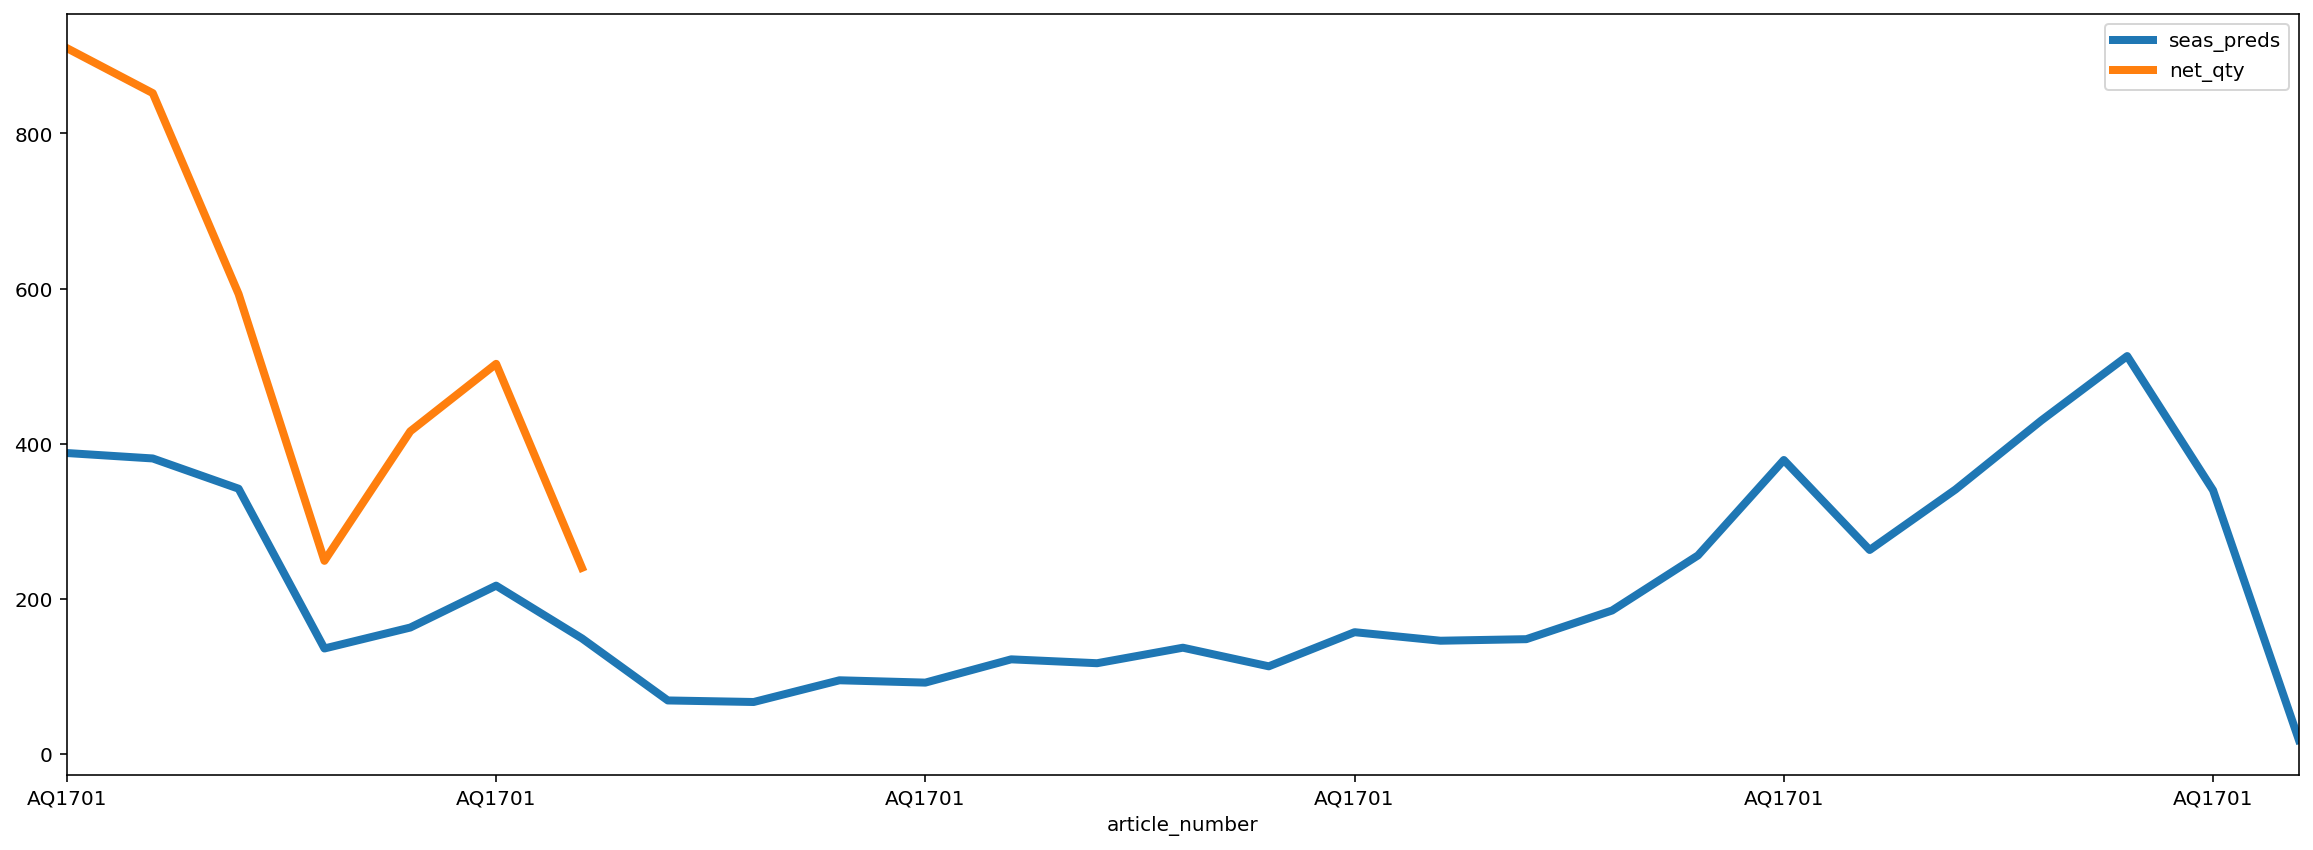

In [170]:
seas[seas.index == aoi][['seas_preds', 'net_qty']].plot(linewidth = 4)

In [171]:
run_data = pd.read_csv('data/run_data.csv')


In [173]:
dat_aoi = run_data[run_data.article_number == aoi].copy()
dat_aoi = pd.merge(pd.DataFrame(dat_aoi.groupby(['year', 'week'])['net_qty'].sum()).reset_index(), dat_aoi[['year', 'week']].drop_duplicates())

dat_aoi.year = [str(x) for x in dat_aoi.year]
dat_aoi.week = [str(x) for x in dat_aoi.week]
dat_aoi['date'] = [dt.datetime.strptime(x[0] + '-' + x[1] + '-1', "%Y-%W-%w") for x in zip(dat_aoi.year, dat_aoi.week)]

plt.rcParams["figure.figsize"] = [20,7]
dat_aoi[['date', 'net_qty']].set_index('date').plot(linewidth = 4)

TypeError: no numeric data to plot

In [159]:
dat_aoi.sort_values('date')

,year,week,net_qty,date
0,2018,48,210.00,2018-11-26
1,2018,49,1444.00,2018-12-03
2,2018,50,1811.00,2018-12-10
3,2018,51,1389.00,2018-12-17
4,2018,52,659.00,2018-12-24
5,2019,1,562.00,2019-01-07
6,2019,2,463.77,2019-01-14
7,2019,3,397.77,2019-01-21
8,2019,4,519.10,2019-01-28
9,2019,5,831.00,2019-02-04


In [160]:
c = pd.read_excel('data/SS21_forecasts_2020-01-22.xlsx', index_col=0)
today = pd.read_excel(file_names[0])

In [164]:
missings = c[~c.article_number.isin(today.article_number.unique())]

In [174]:
primary_file = 'data/ch4k_eu.csv'

dat0 = pd.read_csv(primary_file)

In [175]:
dat0[dat0.article_number == 'AQ1701']

,article_number,brand,year,week,country,season,season_year,gross_demand_quantity,net_qty,clearance,outlet,price,cost,margin,season_gross_demand_quantity,season_net_qty,buy_availability,model_no,art_desc,sports_cat_desc,rmh_cat_desc,franchise,gender_desc,age_group_desc,prod_grp_desc,prod_type_desc
